In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')

miDatasetPath = '/content/winequality-red.csv'
wine_df  = pd.read_csv(miDatasetPath, header=0)

wine_df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Funciones de exploracion de datos

In [ ]:
def MostrarDistribucionColumna(columna):
    x=wine_df[columna]
    sns.distplot(x,kde=False)

    plt.xlabel(columna, fontsize= 12)
    plt.ylabel("Cantidad", fontsize= 12)
    plt.show();

def AnalisisColumna(columna):
    
    x=wine_df[columna]

    f, axes = plt.subplots(1,2,figsize=(14,4))

    sns.distplot(x, ax = axes[0])
    axes[0].set_xlabel(columna, fontsize=14)
    axes[0].set_ylabel('cantidad', fontsize=14)
    axes[0].yaxis.tick_left()

    sns.violinplot(x = 'quality', y = columna, data = wine_df, hue = 'quality',ax = axes[1])
    axes[1].set_xlabel('quality', fontsize=14)
    axes[1].set_ylabel(columna, fontsize=14)
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

    plt.show();
    
    print("Vinos Buenos")
    print("---------------------------------")
    tmp = wine_df[wine_df['quality']=="1"]
    print(tmp[columna].describe())
    print("")
    print("Vinos Malos")
    print("---------------------------------")
    tmp = wine_df[wine_df['quality']=="0"]
    print(tmp[columna].describe())

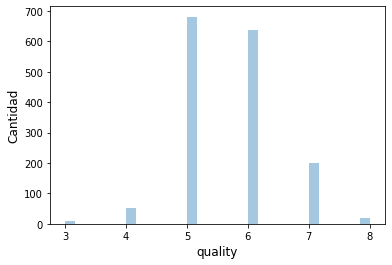

In [ ]:
MostrarDistribucionColumna('quality')

Discretizar la columna calidad del vino

In [ ]:
wine_df['quality'] = ['1' if x>=7 else '0' for x in wine_df['quality']]

In [ ]:
wine_df['quality'].describe()

count     1599
unique       2
top          0
freq      1382
Name: quality, dtype: object

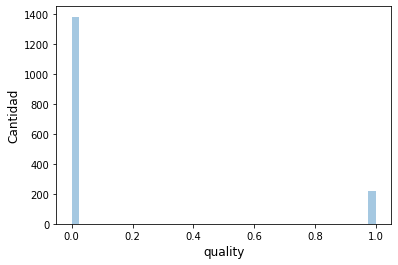

In [ ]:
MostrarDistribucionColumna('quality')

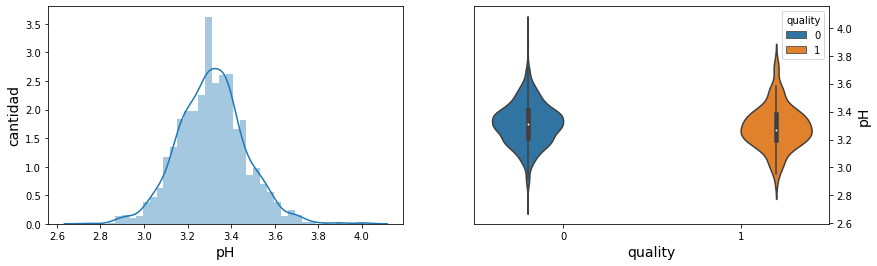

Vinos Buenos
---------------------------------
count    217.000000
mean       3.288802
std        0.154478
min        2.880000
25%        3.200000
50%        3.270000
75%        3.380000
max        3.780000
Name: pH, dtype: float64

Vinos Malos
---------------------------------
count    1382.000000
mean        3.314616
std         0.154135
min         2.740000
25%         3.210000
50%         3.310000
75%         3.410000
max         4.010000
Name: pH, dtype: float64


In [ ]:
import warnings
warnings.filterwarnings("ignore")

AnalisisColumna('pH')


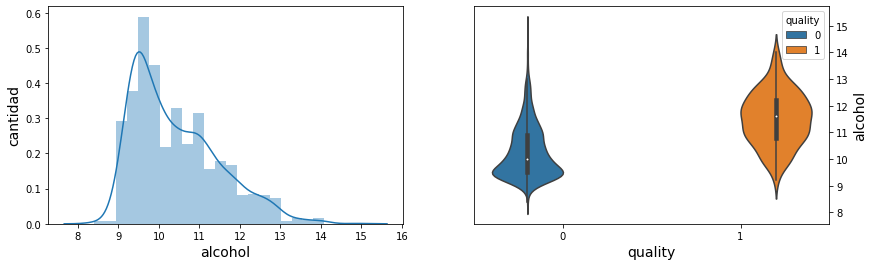

Vinos Buenos
---------------------------------
count    217.000000
mean      11.518049
std        0.998153
min        9.200000
25%       10.800000
50%       11.600000
75%       12.200000
max       14.000000
Name: alcohol, dtype: float64

Vinos Malos
---------------------------------
count    1382.000000
mean       10.251037
std         0.969664
min         8.400000
25%         9.500000
50%        10.000000
75%        10.900000
max        14.900000
Name: alcohol, dtype: float64


In [ ]:
AnalisisColumna('alcohol')

Estandarizar el Dataset

z = (x - u) / s

Los algoritmos que trabajan con distancias deben ser estandarizados

en este caso entre -1 y 1



In [ ]:
from sklearn.preprocessing import StandardScaler

df = wine_df
y = df['quality']

sc = StandardScaler()
X_Standart = sc.fit_transform(df)

X_Standart


array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.39625599],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.39625599],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.39625599],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988, -0.39625599],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.39625599],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988, -0.39625599]])

## ***PCA: Principal component Analisys*** 

pasar de 11 dimensiones a 3

PCA was invented in 1901 by Karl Pearson

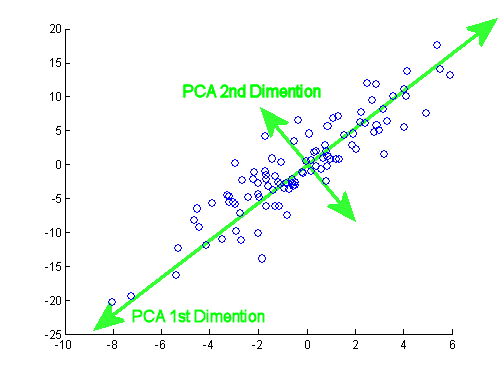


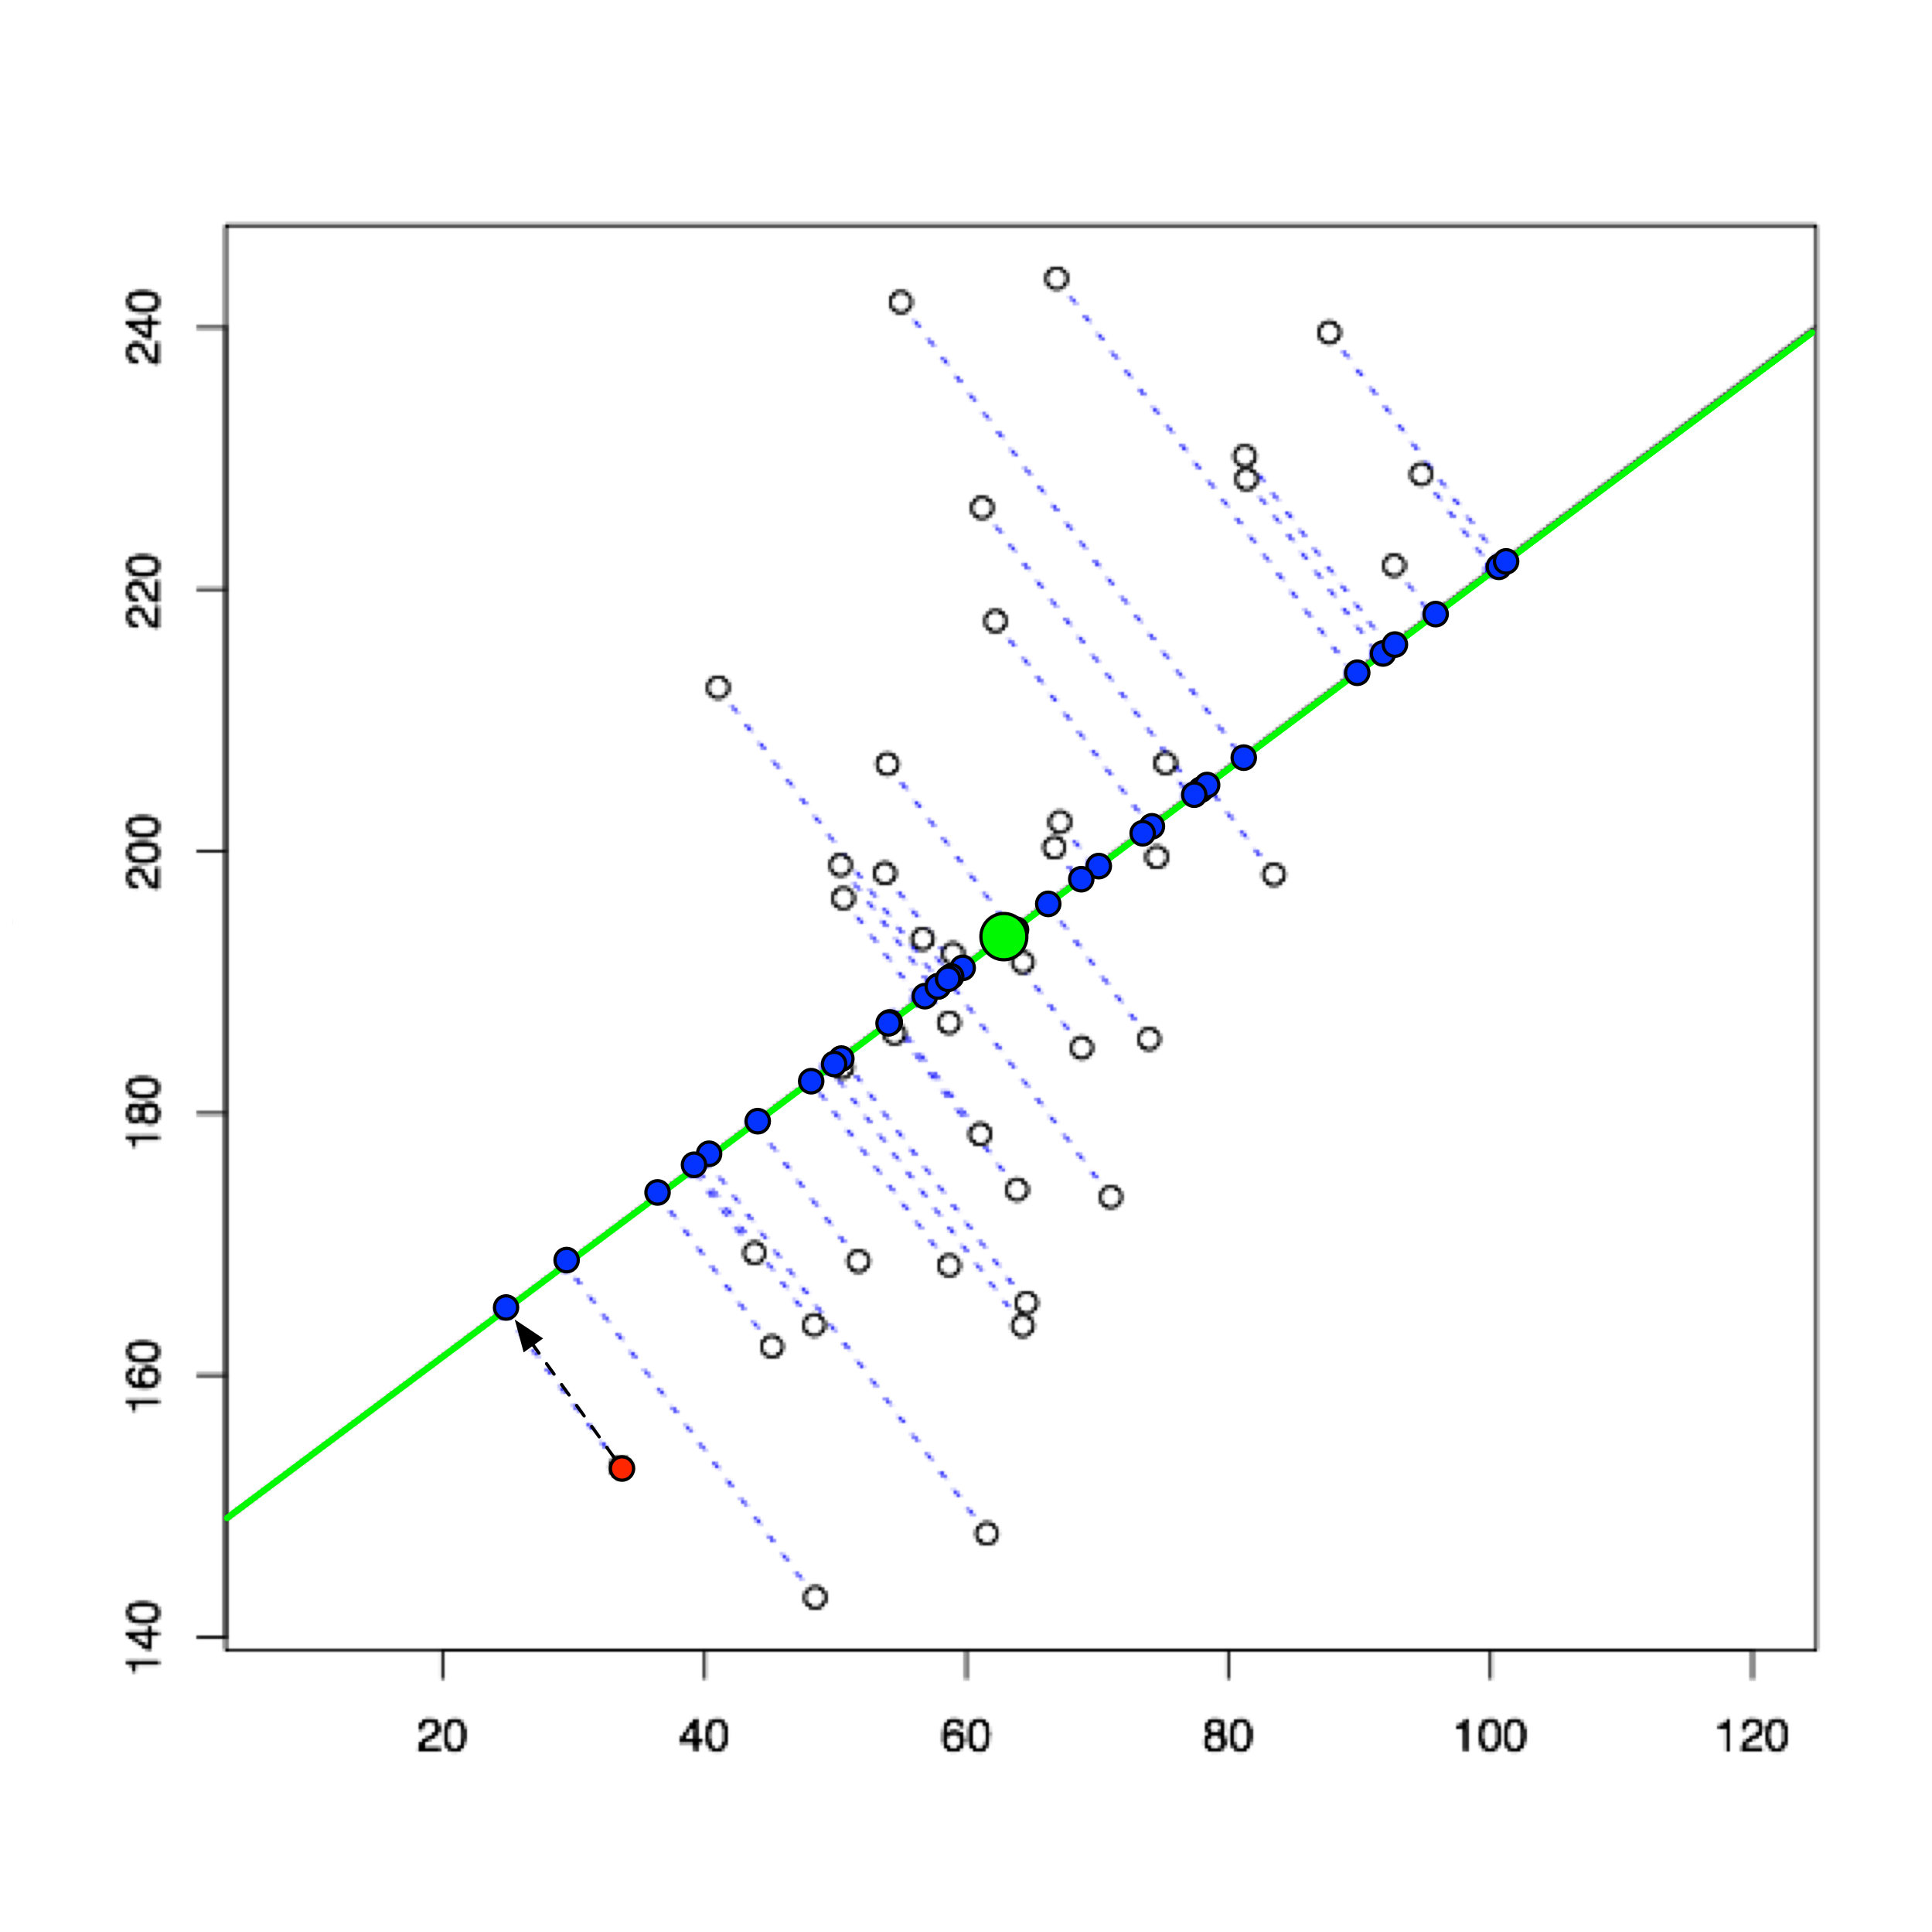

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)  # we will reduce the data set from 11 columns to 2 columns.
X_PCA = pca.fit_transform(X_Standart) # fit means train, fit_transform means train and apply to a data set.

X_PCA

array([[-1.70716697,  0.92903255, -1.41814163],
       [-0.91591679,  1.93107029, -0.09158299],
       [-0.83957699,  1.1856365 , -0.73328532],
       ...,
       [-1.46997418,  0.00861634,  1.05252445],
       [-2.31699956,  0.67183955,  0.90493975],
       [-0.40533931, -0.78165981,  1.12270951]])

In [ ]:
idx_1 = np.where(y == "1")
idx_0 = np.where(y == "0")


Matrix_Buenos = X_PCA[idx_1]

Matrix_Malos = X_PCA[idx_0]


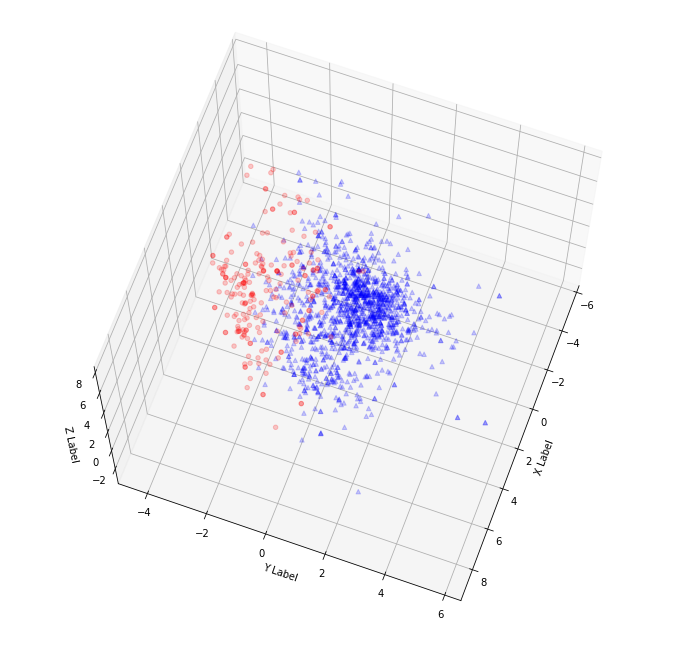

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

xs =Matrix_Buenos[:,0] #X, buenos
ys =Matrix_Buenos[:,1] #Y, buenos
zs =Matrix_Buenos[:,2] #Z, buenos

xt =Matrix_Malos[:,0]#X malos
yt =Matrix_Malos[:,1]#Y malos
zt =Matrix_Malos[:,2]#Z malos

ax.scatter(xs, ys, zs, c='r', marker='o',alpha=0.2)
ax.scatter(xt, yt, zt, c='b', marker='^',alpha=0.2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

angle = 20
ax.view_init(70, angle)
plt.draw()
plt.show()


## ***T-SNE*** 

Developed in 2007 by Sam Roweis and Geoffrey Hinton

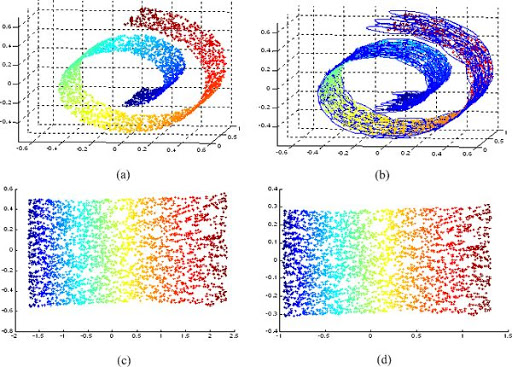

In [ ]:
from sklearn.manifold import TSNE

print("Computing t-SNE reduction to 3 dimensions")

tsne = TSNE(n_components=3)
Data_TSE = tsne.fit_transform(X_Standart)


Computing t-SNE reduction to 3 dimensions


In [ ]:
Matrix_Buenos = Data_TSE[idx_1]
Matrix_Malos = Data_TSE[idx_0]

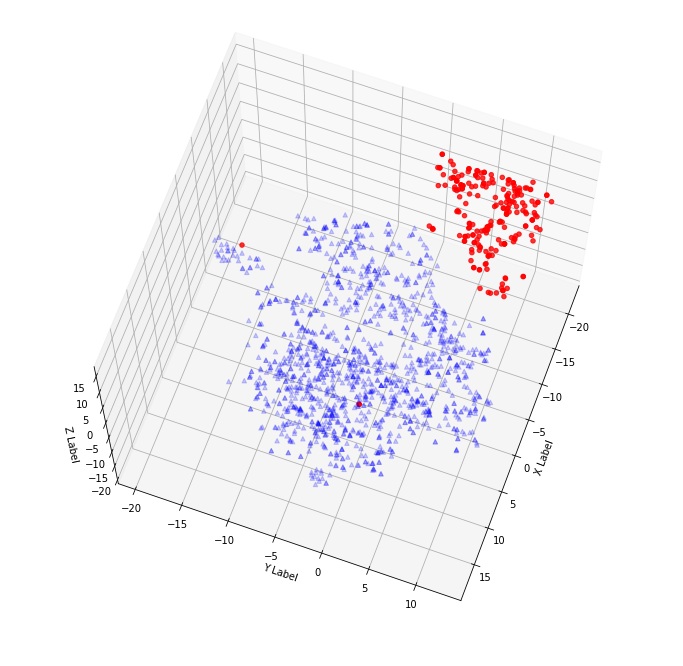

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

xs =Matrix_Buenos[:,0] #X, buenos
ys =Matrix_Buenos[:,1] #Y, buenos
zs =Matrix_Buenos[:,2] #Z, buenos

xt =Matrix_Malos[:,0]#X malos
yt =Matrix_Malos[:,1]#Y malos
zt =Matrix_Malos[:,2]#Z malos

ax.scatter(xs, ys, zs, c='r', marker='o',alpha=0.8)
ax.scatter(xt, yt, zt, c='b', marker='^',alpha=0.2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

angle = 20
ax.view_init(70, angle)
plt.draw()
plt.show()

Se nota claramente que se puede clasficar entre bueno y malo

**Random Forest**

In [ ]:
X = wine_df.drop(['quality'], axis = 1) 
Y = wine_df["quality"] 

In [ ]:
from sklearn.model_selection import train_test_split 

xTrain, xTest, yTrain, yTest = train_test_split( 
        X, Y, test_size = 0.2, random_state = 42) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
# creacion del modelo
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# precciones con el dataset de test
yPred = rfc.predict(xTest) 

Text(0.5, 1.0, 'Importancia de las variables')

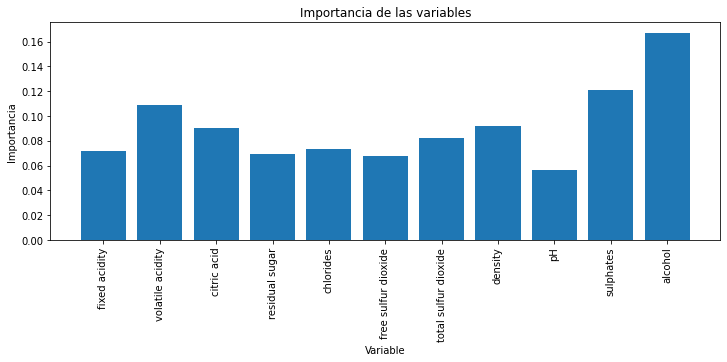

In [ ]:
Cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    
importances = rfc.feature_importances_

x_values = list(range(len(importances)))

fig = plt.figure(figsize=(12,4))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, Cols, rotation=90)
plt.ylabel('Importancia')
plt.xlabel('Variable')
plt.title('Importancia de las variables')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

yPred = yPred.astype('float64')

yTest = yTest.astype('float64')
  
n_errors = (yPred != yTest).sum() 
print("Modelo:  Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("Accuracy  {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("Precision  {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("Recall {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print(" F1-Score  {}".format(f1)) 

Modelo:  Random Forest classifier
Accuracy  0.909375
Precision  0.8
Recall 0.5106382978723404
 F1-Score  0.6233766233766233
